<a href="https://colab.research.google.com/github/ManuelOtt-code/Project-DC/blob/master/Data_extraction%2Bprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Antioxidants Data Curation (Data from AODB)

## **Hi there. Execute the code unless noted otherwise in this manner here. **

In [ ]:
!pip install rdkit # Order of installment was important now it should work
!pip install networkx[default]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 41.0 MB/s eta 0:00:00


In [ ]:
#RUN THIS CELL IF func.py CHANGES

#get functions from functions file (still have to move most of the functions there!)
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/func.py
%run func.py


--2025-06-23 17:58:38--  https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/func.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/func.py [following]
--2025-06-23 17:58:39--  https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6467 (6.3K) [text/plain]
Saving to: ‘func.py’

func.py             100%[===================>]   6.32K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2025-06-23 17:58:39 (58.2 MB/s) - ‘func.py’ sav

In [ ]:
#Import packages

import pandas as pd
import re
import numpy as np
import os
from google.colab import drive
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit import RDLogger
import matplotlib.pyplot as plt
import math
from sklearn.manifold import TSNE
RDLogger.DisableLog("rdApp.info")

## **We sent you an invite to the following file which contains our raw data from AODB. Apparantly it was too big for GitHub... **

https://drive.google.com/file/d/1oc3pU4BPqn1T-Rta9qZtYNfypGgWt3XH/view?usp=sharing

In [ ]:
#Get data export from AODB by adding it (locally) or in drive (colab needs to be connected to drive)
drive.mount('/content/drive', force_remount=True)

file_path = "/content/drive/MyDrive/AODB_antio_compounds.csv" #https://drive.google.com/file/d/1oc3pU4BPqn1T-Rta9qZtYNfypGgWt3XH/view?usp=sharing to get acces to csv
df_AODB_all = pd.read_csv(file_path)

# Print the first 5 rows of the dataset
df_AODB_all.head()

Mounted at /content/drive


/tmp/ipython-input-5-353067027.py:5: DtypeWarning: Columns (16,17,18,19,20,21,22,29,31,37,40,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_AODB_all = pd.read_csv(file_path)


,AOX ID,SMILES,InChI,Molecular Formula,Molecular Weight,AlogP,HBD,HBA,Polar Surface Area,Rotatable Bonds,...,Hepatotoxic Prediction,Hepatotoxic Applicability,Hepatotoxic Applicability MD,Hepatotoxic Applicability MDpvalue,Absorption Level,PPB,PPB Prediction,PPB Applicability,PPB Applicability MD,PPB Applicability MDpvalue
0,AOXMO00001,COc1ccc(C2C=C(c3cccc4ccccc34)Nc3nncn32)cc1,InChI=1S/C22H18N4O/c1-27-17-11-9-16(10-12-17)2...,C22H18N4O,354.4,4.50,1,5,52.0,3,...,1.0,All properties and OPS components are within e...,14.1743,2.660000e-06,0.0,-4.580720,0.0,All properties and OPS components are within e...,14.1423,7.582010e-02
1,AOXMO00002,c1coc(-c2cc(-c3cccc4ccccc34)nc3nncn23)c1,InChI=1S/C19H12N4O/c1-2-7-14-13(5-1)6-3-8-15(1...,C19H12N4O,312.3,4.20,0,5,56.2,2,...,1.0,All properties and OPS components are within e...,15.1409,2.280000e-08,0.0,0.024041,1.0,All properties and OPS components are within e...,17.1115,8.360000e-07
2,AOXMO00003,CN(C)c1ccc(-c2cc(-c3cccc4ccccc34)nc3nncn23)cc1,InChI=1S/C23H19N5/c1-27(2)18-12-10-17(11-13-18...,C23H19N5,365.4,4.68,0,5,46.3,3,...,1.0,All properties and OPS components are within e...,13.5232,4.670000e-05,0.0,4.156700,1.0,All properties and OPS components are within e...,16.8879,2.670000e-06
3,AOXMO00004,COc1ccc(-c2cc(-c3cccc4ccccc34)nc3nncn23)cc1OC,InChI=1S/C23H18N4O2/c1-28-21-11-10-16(12-22(21...,C23H18N4O2,382.4,4.63,0,6,61.5,4,...,1.0,All properties and OPS components are within e...,13.0418,3.183260e-04,0.0,4.177740,1.0,All properties and OPS components are within e...,16.3324,3.930000e-05
4,AOXMO00005,c1ccc(-c2cc(-c3cccc4ccccc34)nc3nncn23)cc1,InChI=1S/C21H14N4/c1-2-8-16(9-3-1)20-13-19(23-...,C21H14N4,322.4,4.61,0,4,43.1,2,...,1.0,All properties and OPS components are within e...,13.5630,3.950000e-05,0.0,3.429540,1.0,All properties and OPS components are within e...,15.9088,2.508250e-04


## Filtering

In [ ]:
print(f"Length of Dataframe before filtering: ",len(df_AODB_all))

#Filter Data rows for data curation (determined by inspection of data)
df_dpph = df_AODB_all[df_AODB_all["Assay Description"].str.contains("DPPH", case=False, na=False) &
          df_AODB_all["Experimental Data"].str.contains("IC50|EC50", case=False, na=False)
      & ~df_AODB_all["Experimental Data"].str.contains("relative|1/IC50|1/EC50|ratio", case=False, na=False)
      & ~df_AODB_all["Activity Comment"].str.contains("Dose dependent data|Not determined", case=False, na=False)
      & ~df_AODB_all["Target Organism"].str.contains("Rattus norvegicus", case=False, na=False)
      & ~df_AODB_all["Assay Description"].str.contains("liposome|relative|ratio|rat brain", case=False, na=False)
      & (df_AODB_all["Molecular Weight"] <= 1000)  # filter only small MW compounds
]
print(f"Length of Dataframe after filtering: ",len(df_dpph))
#Reset index
df_dpph.reset_index(drop=True, inplace=True)

Length of Dataframe before filtering:  98313
Length of Dataframe after filtering:  5187


## Canonicalize and Standardize SMILES

In [ ]:
#standardize and canonicalize smiles and add new column canonical_Smiles
df_dpph["canonical_Smiles"] = df_dpph["SMILES"].apply(rdMolStandardize.StandardizeSmiles)

/tmp/ipython-input-7-2180633967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dpph["canonical_Smiles"] = df_dpph["SMILES"].apply(rdMolStandardize.StandardizeSmiles)


## Convert Activity values

In [ ]:
# problems if run multiple times

# Apply parsing and expand into new columns
parsed_data = df_dpph['Experimental Data'].apply(parse_experimental_data).apply(pd.Series)

# Combine with original DataFrame
df_dpph = pd.concat([df_dpph, parsed_data], axis=1)

# Apply conversion and force float dtype
df_dpph['value_nM'] = df_dpph.apply(convert_units, axis=1).astype(float)

#check if ugmL-1 were properly converted
print(df_dpph[df_dpph['units']=='ugmL-1'])

# Apply conversion to each row of the compounds DataFrame
df_dpph["pIC50"] = df_dpph.apply(lambda x: convert_ic50_to_pic50(x.value_nM), axis=1)
df_dpph.head()

          AOX ID                                             SMILES  \
18    AOXMO00508                 Cc1n[nH]c(=O)n1/N=C/c1ccc(O)c(O)c1   
19    AOXMO00509         O=c1[nH]nc(Cc2ccccc2)n1/N=C/c1ccc(O)c(O)c1   
20    AOXMO00510     O=c1[nH]nc(Cc2ccc(Cl)cc2)n1/N=C/c1ccc(O)c(O)c1   
21    AOXMO00511     COc1ccc(Cc2n[nH]c(=O)n2/N=C/c2ccc(O)c(O)c2)cc1   
22    AOXMO00512         O=c1[nH]nc(-c2ccccc2)n1/N=C/c1ccc(O)c(O)c1   
...          ...                                                ...   
4849  AOXMO44737  Cc1ccc2c3c([nH]c2c1)C1=C(C#N)C(=O)NC1(C1C(=O)N...   
4850  AOXMO44738                    O=C1O[C@H]([C@@H](O)CO)C(O)=C1O   
4956  AOXMO46263  CCOC(=O)c1cc2ccc(OCc3cn(Cc4ccc([N+](=O)[O-])cc...   
4957  AOXMO46264                   Cc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1   
5009  AOXMO46434             Cc1ccc(C(=O)CC(=O)c2cc3ccccc3s2)c(O)c1   

                                                  InChI Molecular Formula  \
18    InChI=1S/C10H10N4O3/c1-6-12-13-10(17)14(6)11-5...        C10H10N

,AOX ID,SMILES,InChI,Molecular Formula,Molecular Weight,AlogP,HBD,HBA,Polar Surface Area,Rotatable Bonds,...,PPB Applicability,PPB Applicability MD,PPB Applicability MDpvalue,canonical_Smiles,activity_type,operator,activity_value,units,value_nM,pIC50
0,AOXMO00050,O=CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3,InChI=1S/C18H15NO3/c20-9-19-6-5-12-8-15-18(22-...,C18H15NO3,293.3,2.69,0,4,38.8,1,...,All properties and OPS components are within e...,16.9487,0.000002,O=CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3,IC50,=,121400.0,nM,121400.0,3.915781
1,AOXMO00051,O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,InChI=1S/C6H8O6/c7-1-2(8)5-3(9)4(10)6(11)12-5/...,C6H8O6,176.1,-1.41,4,6,107.2,2,...,All properties and OPS components are within e...,14.3277,0.048874,O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,IC50,=,52100.0,nM,52100.0,4.283162
2,AOXMO00487,Cc1c(/N=C/c2ccccc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C18H17N3O/c1-14-17(19-13-15-9-5-3-6-1...,C18H17N3O,291.4,3.24,0,4,39.3,3,...,All properties and OPS components are within e...,11.4141,0.980298,Cc1c(/N=C/c2ccccc2)c(=O)n(-c2ccccc2)n1C,IC50,=,31260.0,nM,31260.0,4.505011
3,AOXMO00488,Cc1c(/N=C/c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C18H16ClN3O/c1-13-17(20-12-14-8-10-15...,C18H16ClN3O,325.8,3.89,0,4,39.3,3,...,All properties and OPS components are within e...,12.4505,0.751763,Cc1c(/N=C/c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,IC50,=,31680.0,nM,31680.0,4.499215
4,AOXMO00489,Cc1c(/N=C/c2ccc(N(C)C)cc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C20H22N4O/c1-15-19(21-14-16-10-12-17(...,C20H22N4O,334.4,3.30,0,5,42.5,4,...,All properties and OPS components are within e...,14.6459,0.021033,Cc1c(/N=C/c2ccc(N(C)C)cc2)c(=O)n(-c2ccccc2)n1C,IC50,=,2430.0,nM,2430.0,5.614394


## Visual inspection of data

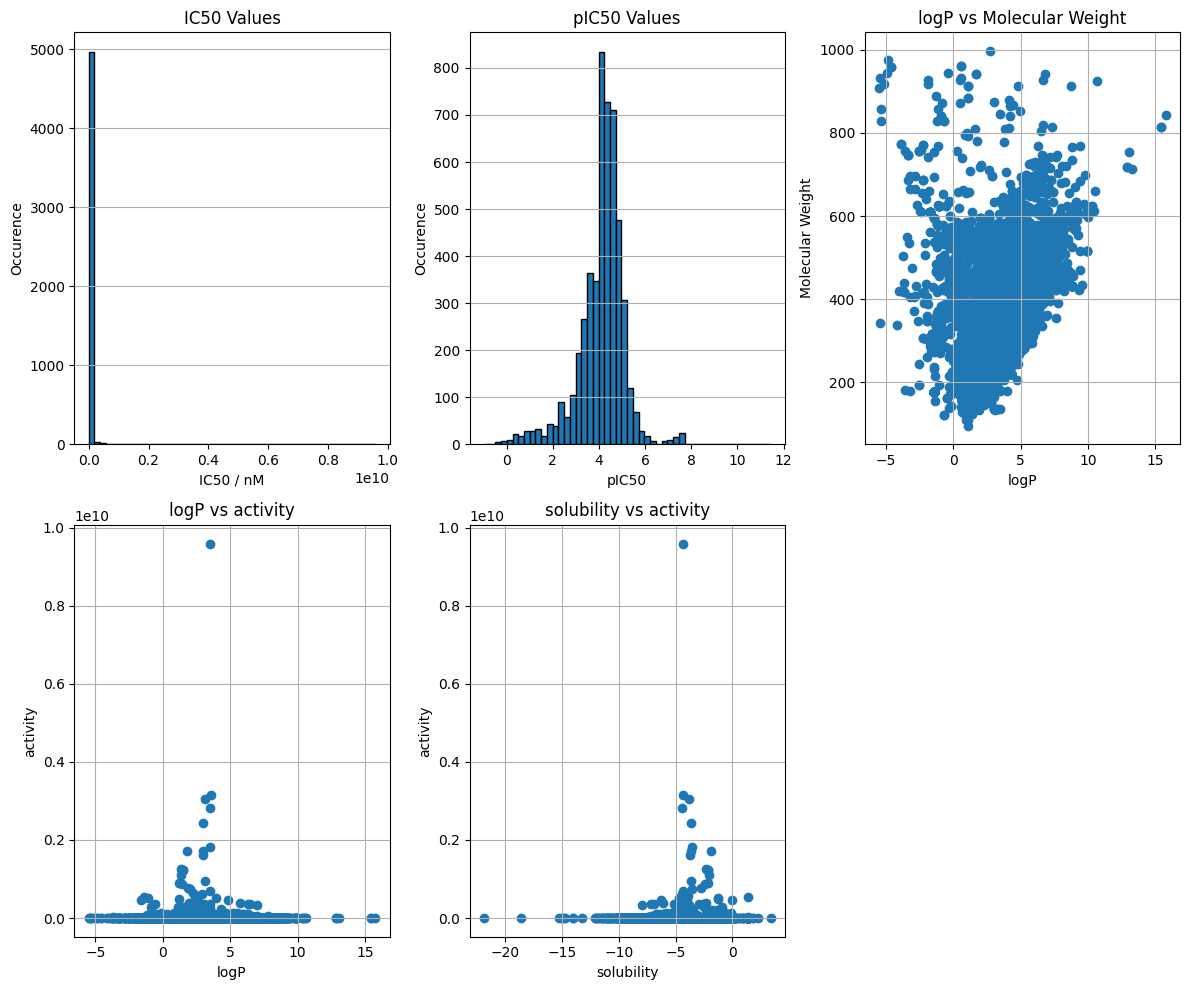

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming df_dpph is already loaded and processed as in the previous steps

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Histogram of IC50 values in nM
axes[0].hist(df_dpph['value_nM'], bins=50, edgecolor='black')
axes[0].set_title('IC50 Values')
axes[0].set_xlabel('IC50 / nM')
axes[0].set_ylabel('Occurence')
axes[0].grid(axis='y')

# Histogram of pIC50 values
axes[1].hist(df_dpph['pIC50'], bins=50, edgecolor='black')
axes[1].set_title('pIC50 Values')
axes[1].set_xlabel('pIC50')
axes[1].set_ylabel('Occurence')
axes[1].grid(axis='y')

# Scatter plot of logP vs Molecular Weight
axes[2].scatter(df_dpph['AlogP'], df_dpph['Molecular Weight'])
axes[2].set_title('logP vs Molecular Weight')
axes[2].set_xlabel('logP')
axes[2].set_ylabel('Molecular Weight')
axes[2].grid(True)

# Scatter plot of logP vs activity (value_nM)
axes[3].scatter(df_dpph['AlogP'], df_dpph['value_nM'])
axes[3].set_title('logP vs activity')
axes[3].set_xlabel('logP')
axes[3].set_ylabel('activity')
axes[3].grid(True)

axes[4].scatter(df_dpph['Solubility'], df_dpph['value_nM'])
axes[4].set_title('solubility vs activity')
axes[4].set_xlabel('solubility')
axes[4].set_ylabel('activity')
axes[4].grid(True)

fig.delaxes(axes[5])

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the figure
plt.show()

### Phenolic or not phenolic?

In [ ]:
#check with phenol SMARTS if compounds are phenolic
phenol = "c1ccccc1[OH]"
df_dpph["is_phenol"] = df_dpph["canonical_Smiles"].apply(is_substruct_in, substruct_smarts = phenol)

print(len(df_dpph[df_dpph["is_phenol"] == True]), len(df_dpph))

fp_array = convert_smiles_series_to_fp_to_np_array(df_dpph["canonical_Smiles"])

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(fp_array)

3053 5187


Streaming output truncated to the last 5000 lines.
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:04:13] DEPRECATION WARNING: please use MorganGenerator
[18:0

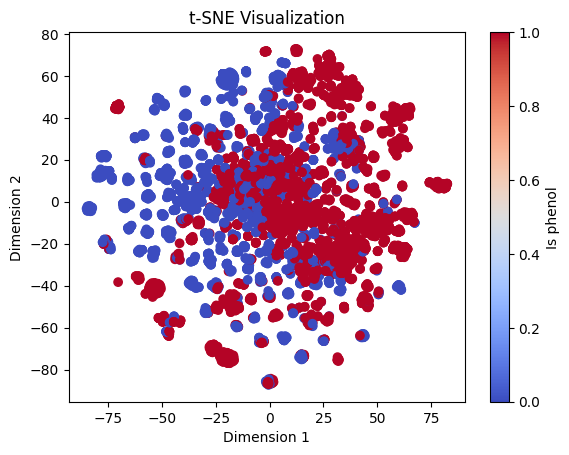

In [ ]:
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=df_dpph["is_phenol"], cmap="coolwarm")
cb = plt.colorbar()
cb.set_label("Is phenol")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.title("t-SNE Visualization")
plt.show()

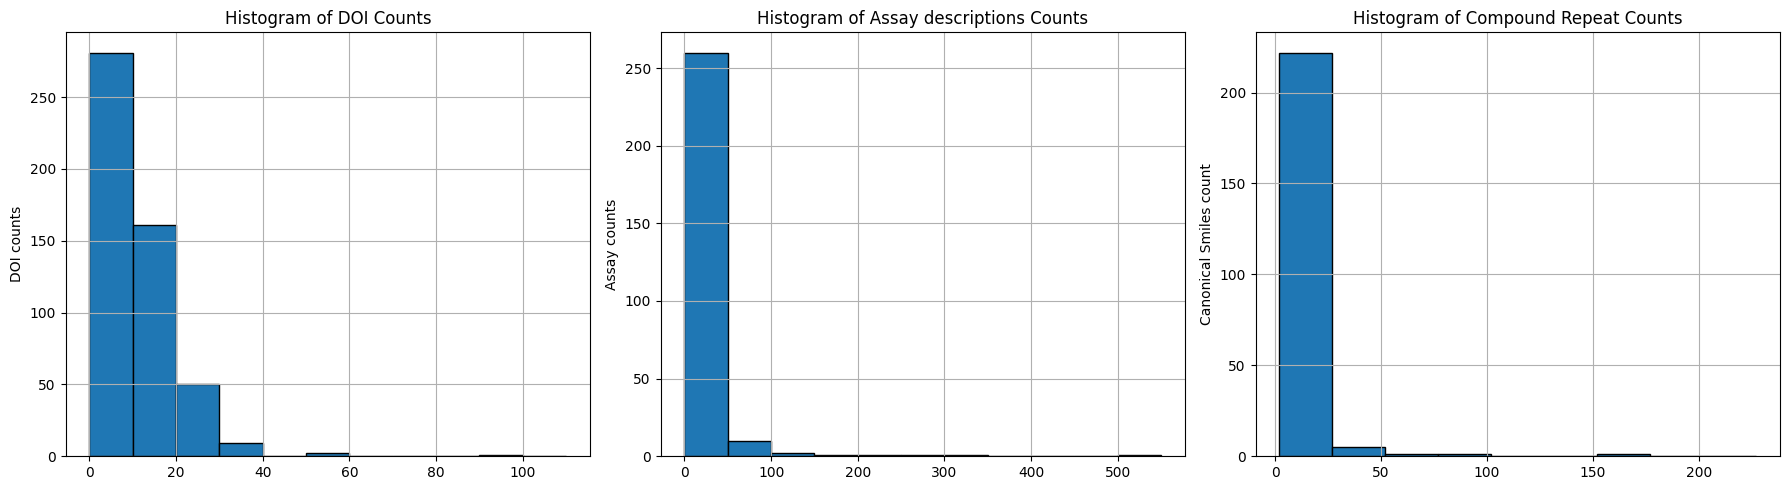

In [ ]:
#getting information about literature sources
df_doi_counts = df_dpph["DOI"].value_counts()
df_assay_desc_count = df_dpph["Assay Description"].value_counts()
df_canonical_smiles_count = df_dpph["canonical_Smiles"].value_counts()

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Adjust figsize as needed

# Plot 1: Histogram of DOI Countsf
binsize_doi = 10
bins_doi = np.arange(0, 120, binsize_doi)
axes[0].hist(df_doi_counts, bins=bins_doi, edgecolor='black')
#axes[0].set_xlabel("#Compounds with same reference")
axes[0].set_ylabel("DOI counts")
axes[0].set_title("Histogram of DOI Counts")
axes[0].grid()

# Plot 2: Histogram of Assay descriptions Counts
binsize_assay = 50
bins_assay = np.arange(0, 600, binsize_assay)
axes[1].hist(df_assay_desc_count, bins=bins_assay, edgecolor='black')
#axes[1].set_xlabel("#Compounds for which measurments this assay was described")
axes[1].set_ylabel("Assay counts")
axes[1].set_title("Histogram of Assay descriptions Counts")
axes[1].grid()

# Plot 3: Histogram of Canonical SMILES Counts
binsize_smiles = 25
bins_smiles = np.arange(2, 250, binsize_smiles)
axes[2].hist(df_canonical_smiles_count, bins=bins_smiles, edgecolor='black')
#axes[2].set_xlabel("#How often compounds were measured")
axes[2].set_ylabel("Canonical Smiles count")
axes[2].set_title("Histogram of Compound Repeat Counts") # Corrected title
axes[2].grid()

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the figure
plt.show()

## Save dataframe as csv to Github

In [ ]:
df_dpph.to_csv("df_dpph.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'df_dpph.csv'

## **We then uploaded the generated csv file to GitHub manually. **